In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images[2].shape

(784,)

In [8]:
sample = mnist.train.images[2].reshape(28,28)

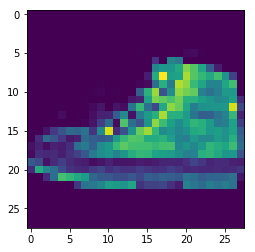

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sample)

In [46]:
# parameters
learning_rate = .001
training_epochs = 15
batch_size = 100

In [27]:
# neural network params
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784 # 28*28
n_classes = 10 # how many categories there are
n_samples = len(mnist.train.images)

In [22]:
# tensorflow graph input
import tensorflow as tf
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [36]:
def multilayer_percepton(x, weights, biases):
    '''
    x : placeholder for data input
    weights : dictionary of weights
    biases : dictionary of biases
    '''
    
    print('x shape: {}'.format(x.shape))
    print('weights shape: {}'.format(weights['h1'].shape))
    # hidden layer 1 with RELU as activation function
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # hidden layer 2 with RELU as activation function
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    return out_layer

In [32]:
weigths = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}

biases = {
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes])),
}

In [37]:
# model
pred = multilayer_percepton(x, weigths, biases)

x shape: (?, 784)
weights shape: (784, 256)


In [40]:
# define loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(cost)

In [42]:
# instantiating variables
init = tf.global_variables_initializer()

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


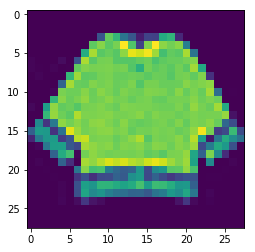

In [44]:
Xsamp, Ysamp = mnist.train.next_batch(1)
plt.imshow(Xsamp.reshape(28,28))
print(Ysamp)

In [48]:
# launching session
sess = tf.InteractiveSession()

# init all variables
sess.run(init)

for epoch in range(1500):
    
    # start cost
    avg_cost = 0.0
    
    # converting total number of batches to int
    total_batch = int(n_samples/batch_size)
    
    for i  in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # calculate cost
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        
        avg_cost += c / total_batch
    
    print('Epoch: {} cost={:.4f}'.format(epoch+1, avg_cost))


Epoch: 1 cost=20127.0703
Epoch: 2 cost=19874.4267
Epoch: 3 cost=19580.9509
Epoch: 4 cost=19258.4012
Epoch: 5 cost=18916.1675
Epoch: 6 cost=18562.3677
Epoch: 7 cost=18198.1272
Epoch: 8 cost=17829.6253
Epoch: 9 cost=17455.7429
Epoch: 10 cost=17081.7982
Epoch: 11 cost=16707.3696
Epoch: 12 cost=16334.2717
Epoch: 13 cost=15964.7159
Epoch: 14 cost=15598.8576
Epoch: 15 cost=15237.5196
Epoch: 16 cost=14880.6242
Epoch: 17 cost=14529.3876
Epoch: 18 cost=14183.8286
Epoch: 19 cost=13843.6797
Epoch: 20 cost=13510.6889
Epoch: 21 cost=13183.9841
Epoch: 22 cost=12864.4855
Epoch: 23 cost=12552.5928
Epoch: 24 cost=12246.9218
Epoch: 25 cost=11948.2754
Epoch: 26 cost=11656.9065
Epoch: 27 cost=11372.3082
Epoch: 28 cost=11094.9701
Epoch: 29 cost=10825.0990
Epoch: 30 cost=10562.0196
Epoch: 31 cost=10305.9137
Epoch: 32 cost=10056.4928
Epoch: 33 cost=9813.5475
Epoch: 34 cost=9576.5300
Epoch: 35 cost=9346.3870
Epoch: 36 cost=9122.0471
Epoch: 37 cost=8903.5582
Epoch: 38 cost=8691.7192
Epoch: 39 cost=8485.2383
Ep

Epoch: 324 cost=429.5686
Epoch: 325 cost=427.4017
Epoch: 326 cost=425.2533
Epoch: 327 cost=423.0860
Epoch: 328 cost=421.0197
Epoch: 329 cost=418.9457
Epoch: 330 cost=416.8775
Epoch: 331 cost=414.8562
Epoch: 332 cost=412.7665
Epoch: 333 cost=410.8260
Epoch: 334 cost=408.8560
Epoch: 335 cost=406.8965
Epoch: 336 cost=404.9604
Epoch: 337 cost=403.0537
Epoch: 338 cost=401.1741
Epoch: 339 cost=399.2888
Epoch: 340 cost=397.4257
Epoch: 341 cost=395.6041
Epoch: 342 cost=393.8082
Epoch: 343 cost=391.9938
Epoch: 344 cost=390.2393
Epoch: 345 cost=388.4725
Epoch: 346 cost=386.7004
Epoch: 347 cost=384.9889
Epoch: 348 cost=383.2455
Epoch: 349 cost=381.5580
Epoch: 350 cost=379.8607
Epoch: 351 cost=378.2092
Epoch: 352 cost=376.5050
Epoch: 353 cost=374.8985
Epoch: 354 cost=373.2535
Epoch: 355 cost=371.6559
Epoch: 356 cost=370.0681
Epoch: 357 cost=368.4429
Epoch: 358 cost=366.8943
Epoch: 359 cost=365.3084
Epoch: 360 cost=363.7751
Epoch: 361 cost=362.2104
Epoch: 362 cost=360.7013
Epoch: 363 cost=359.1903


Epoch: 652 cost=169.4459
Epoch: 653 cost=169.1076
Epoch: 654 cost=168.7658
Epoch: 655 cost=168.4386
Epoch: 656 cost=168.1025
Epoch: 657 cost=167.7657
Epoch: 658 cost=167.4387
Epoch: 659 cost=167.0946
Epoch: 660 cost=166.7683
Epoch: 661 cost=166.4438
Epoch: 662 cost=166.1035
Epoch: 663 cost=165.7563
Epoch: 664 cost=165.4390
Epoch: 665 cost=165.1070
Epoch: 666 cost=164.7640
Epoch: 667 cost=164.4310
Epoch: 668 cost=164.1061
Epoch: 669 cost=163.7714
Epoch: 670 cost=163.4389
Epoch: 671 cost=163.1086
Epoch: 672 cost=162.7716
Epoch: 673 cost=162.4387
Epoch: 674 cost=162.1190
Epoch: 675 cost=161.7646
Epoch: 676 cost=161.4433
Epoch: 677 cost=161.1202
Epoch: 678 cost=160.7788
Epoch: 679 cost=160.4703
Epoch: 680 cost=160.1021
Epoch: 681 cost=159.7990
Epoch: 682 cost=159.4581
Epoch: 683 cost=159.1362
Epoch: 684 cost=158.8066
Epoch: 685 cost=158.4921
Epoch: 686 cost=158.1313
Epoch: 687 cost=157.8270
Epoch: 688 cost=157.4888
Epoch: 689 cost=157.1712
Epoch: 690 cost=156.8381
Epoch: 691 cost=156.5109


Epoch: 986 cost=43.7691
Epoch: 987 cost=43.5174
Epoch: 988 cost=43.2679
Epoch: 989 cost=43.0387
Epoch: 990 cost=42.7837
Epoch: 991 cost=42.5589
Epoch: 992 cost=42.3125
Epoch: 993 cost=42.0862
Epoch: 994 cost=41.8560
Epoch: 995 cost=41.6258
Epoch: 996 cost=41.3955
Epoch: 997 cost=41.1723
Epoch: 998 cost=40.9444
Epoch: 999 cost=40.7327
Epoch: 1000 cost=40.4963
Epoch: 1001 cost=40.2858
Epoch: 1002 cost=40.0708
Epoch: 1003 cost=39.8539
Epoch: 1004 cost=39.6427
Epoch: 1005 cost=39.4394
Epoch: 1006 cost=39.2089
Epoch: 1007 cost=39.0116
Epoch: 1008 cost=38.8065
Epoch: 1009 cost=38.6072
Epoch: 1010 cost=38.3938
Epoch: 1011 cost=38.1991
Epoch: 1012 cost=37.9993
Epoch: 1013 cost=37.8048
Epoch: 1014 cost=37.6102
Epoch: 1015 cost=37.4168
Epoch: 1016 cost=37.2256
Epoch: 1017 cost=37.0453
Epoch: 1018 cost=36.8347
Epoch: 1019 cost=36.6566
Epoch: 1020 cost=36.4759
Epoch: 1021 cost=36.2792
Epoch: 1022 cost=36.1021
Epoch: 1023 cost=35.9206
Epoch: 1024 cost=35.7396
Epoch: 1025 cost=35.5592
Epoch: 1026 co

Epoch: 1315 cost=13.8163
Epoch: 1316 cost=13.7790
Epoch: 1317 cost=13.7530
Epoch: 1318 cost=13.7235
Epoch: 1319 cost=13.6946
Epoch: 1320 cost=13.6644
Epoch: 1321 cost=13.6358
Epoch: 1322 cost=13.6068
Epoch: 1323 cost=13.5782
Epoch: 1324 cost=13.5495
Epoch: 1325 cost=13.5202
Epoch: 1326 cost=13.4915
Epoch: 1327 cost=13.4635
Epoch: 1328 cost=13.4352
Epoch: 1329 cost=13.4070
Epoch: 1330 cost=13.3792
Epoch: 1331 cost=13.3513
Epoch: 1332 cost=13.3227
Epoch: 1333 cost=13.2945
Epoch: 1334 cost=13.2676
Epoch: 1335 cost=13.2395
Epoch: 1336 cost=13.2121
Epoch: 1337 cost=13.1846
Epoch: 1338 cost=13.1573
Epoch: 1339 cost=13.1299
Epoch: 1340 cost=13.1028
Epoch: 1341 cost=13.0756
Epoch: 1342 cost=13.0486
Epoch: 1343 cost=13.0226
Epoch: 1344 cost=12.9940
Epoch: 1345 cost=12.9684
Epoch: 1346 cost=12.9418
Epoch: 1347 cost=12.9167
Epoch: 1348 cost=12.8899
Epoch: 1349 cost=12.8612
Epoch: 1350 cost=12.8371
Epoch: 1351 cost=12.8120
Epoch: 1352 cost=12.7846
Epoch: 1353 cost=12.7598
Epoch: 1354 cost=12.7344
